# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

# Toy data set

## Load and generate data

In [2]:
data = loadmat('datasets/toydata.mat')
A = np.array(data["A"])
B = np.array(data["B"])
C = np.array([[1,1],[3,2]])

XX = base.ktensor(A,B,C)

## Find parafac decomposition with cp_opt

In [3]:
factors, result, _, log = cp.cp_opt(XX, rank=2, init='random', gtol=1e-5)
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Optimization terminated successfully.
F(x): 0.0003137312420869495
Number of iterations: 811
Number of function evaluations: 1596


/home/marie/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


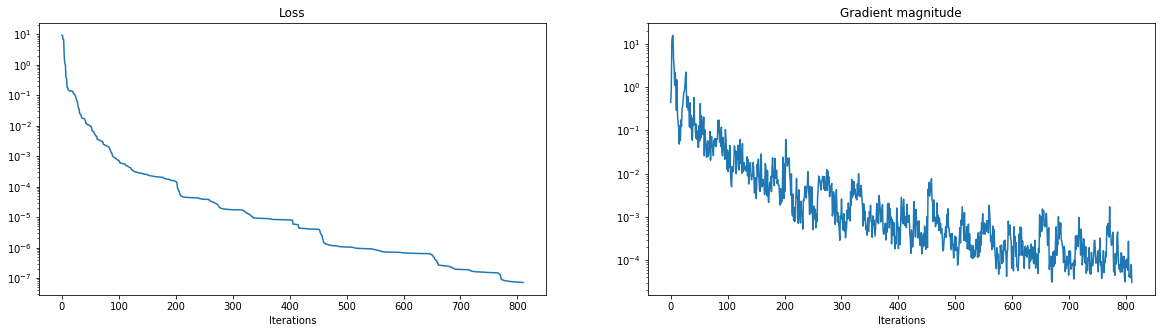

In [4]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(log.loss_values)
ax1.set_title('Loss')
ax1.set_xlabel('Iterations')

ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(log.gradient_values)
ax2.set_title('Gradient magnitude')
ax2.set_xlabel('Iterations')

ax2.set_yscale('log')

fig.show()

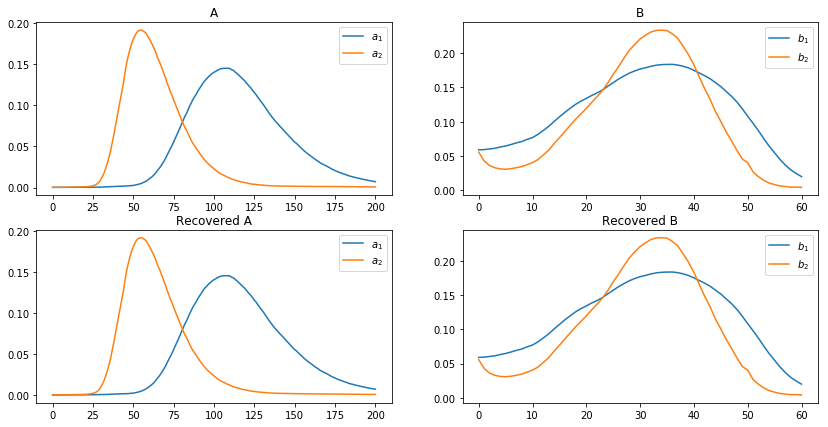

In [5]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(2,2,figsize=(14,7))
axes[0,0].plot(A)
axes[0,1].plot(B)

axes[0,0].set_title("A")
axes[0,1].set_title("B")
axes[0,0].legend(["$a_1$", "$a_2$"])
axes[0,1].legend(["$b_1$", "$b_2$"])

axes[1,0].plot(factors[0])
axes[1,1].plot(factors[1]) 

axes[1,0].set_title("Recovered A")
axes[1,1].set_title("Recovered B")
axes[1,0].legend(["$a_1$", "$a_2$"])
axes[1,1].legend(["$b_1$", "$b_2$"])
plt.show()

# Aminoacid dataset

## Load data

In [6]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)

## Find parafac decomposition with cp_opt

In [21]:
factors, result, initial_factors, log = cp.cp_opt(X, rank=3, method='L-BFGS-B', init='svd', gtol=1e-15)

In [22]:
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
F(x): 0.0003137312420869495
Number of iterations: 63
Number of function evaluations: 73


/home/marie/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


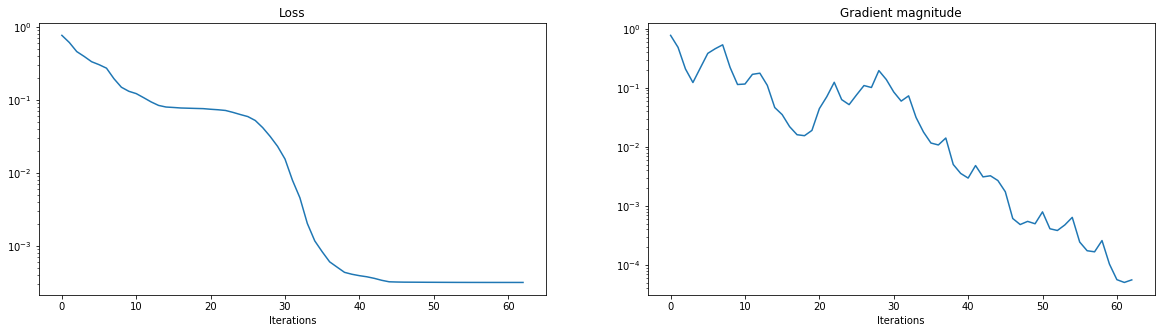

In [23]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(log.loss_values)
ax1.set_title('Loss')
ax1.set_xlabel('Iterations')

ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(log.gradient_values)
ax2.set_title('Gradient magnitude')
ax2.set_xlabel('Iterations')

ax2.set_yscale('log')

fig.show()

In [10]:
print(result)

      fun: 0.00031371569831545684
 hess_inv: <801x801 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.93047340e-05,  2.64881542e-07, -7.61066468e-07, -1.14051107e-05,
        3.07546090e-06,  1.00394616e-06,  1.15149037e-05, -5.66653240e-06,
       -2.23089138e-06, -1.26352220e-05,  3.99416745e-06, -1.85333345e-06,
       -7.16226607e-06,  4.50949907e-06, -7.30046538e-07,  5.67900377e-08,
       -1.59536716e-08, -8.08529442e-08,  6.14047938e-08, -1.79482676e-08,
       -8.16645598e-08,  5.89102766e-08, -1.80246064e-08, -8.04019877e-08,
        5.24917563e-08, -1.54987851e-08, -7.66080435e-08,  6.17442182e-08,
       -1.59480293e-08, -8.42357194e-08,  6.41639062e-08, -1.76234540e-08,
       -7.74931181e-08,  7.30910082e-08, -1.82325603e-08, -8.49599050e-08,
        7.06883565e-08, -1.26436249e-08, -8.32528478e-08,  8.03733259e-08,
       -1.52734282e-08, -8.63263913e-08,  1.04042838e-07, -2.20629850e-08,
       -1.03119478e-07,  1.04542071e-07, -1.67195961e-08, -1.01173224e

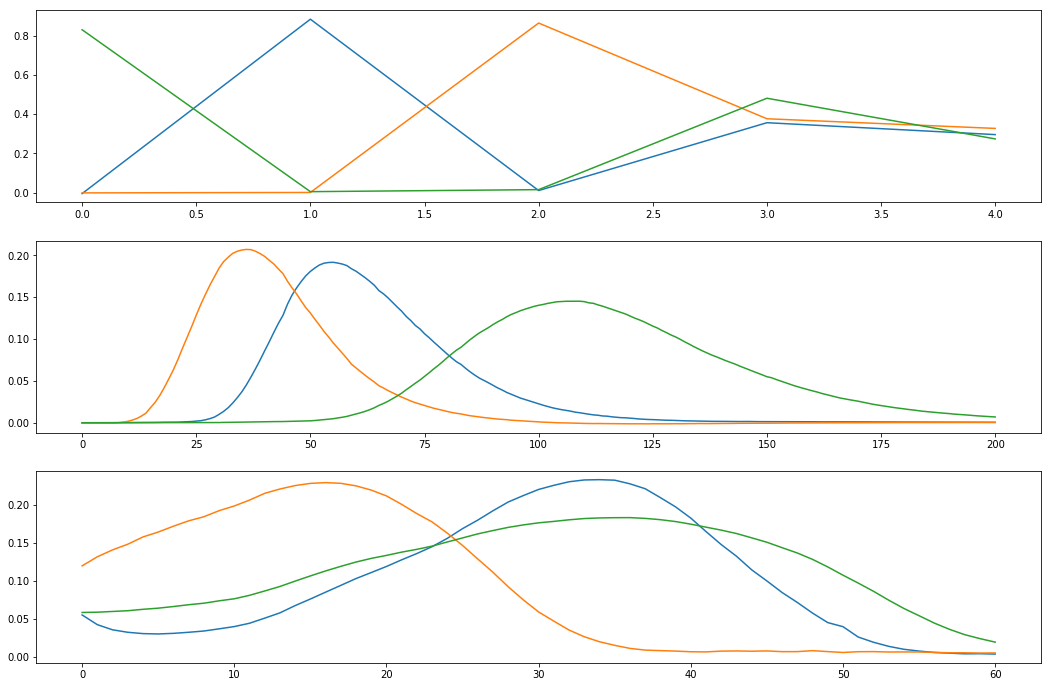

In [11]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(factors[i])
plt.show()

## Let's plot the initialization

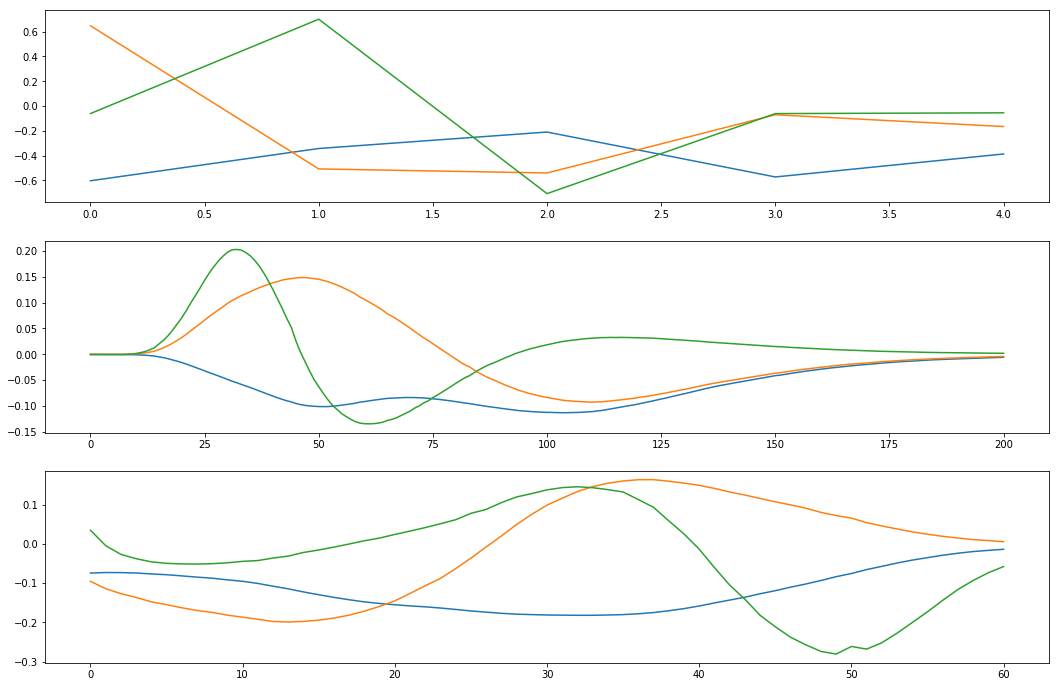

In [12]:
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(initial_factors[i])
plt.show()

## What happens when we look for wrong amount of  factors?

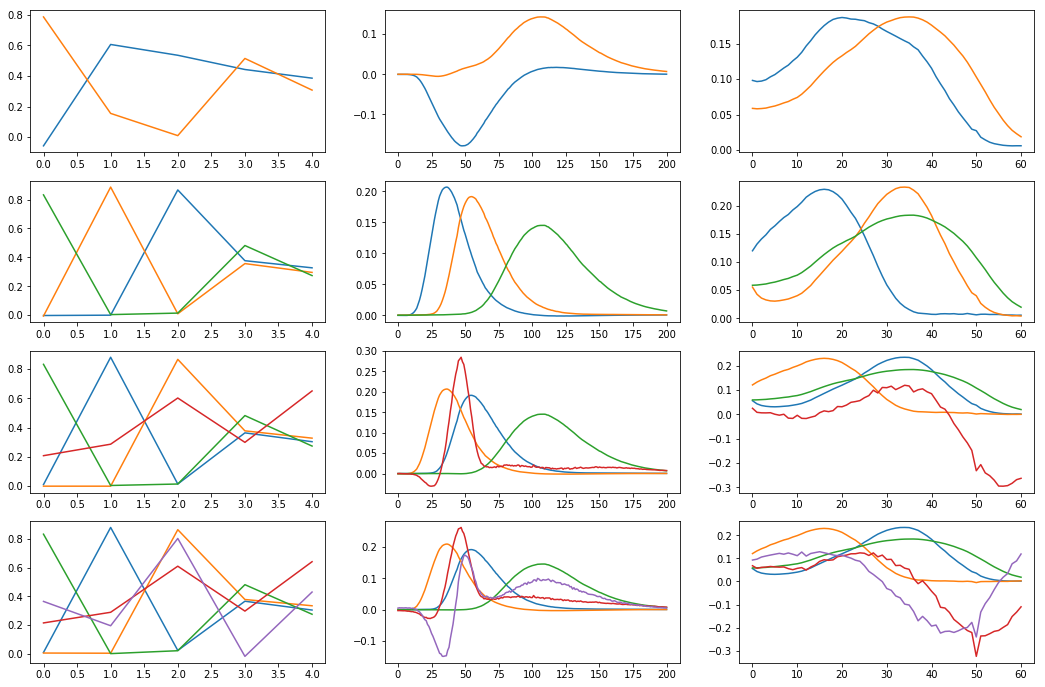

In [13]:
rank_list = [2,3,4,5]

fig, axes = plt.subplots(len(rank_list), 3, figsize=(18,12))
    
for i, rank in enumerate(rank_list):
    factors_unnorm, result,_,_ = cp.cp_opt(X, rank=rank, init='svd', gtol=1e-15)
    factors, sign, norms = cp.prepare_for_comparison(factors_unnorm)
    for j in range(3):
        axes[i][j].plot(factors[j])
        
plt.show()

## We can look at the weights of each component in the four component model

In [14]:
weights = np.prod(norms,axis=0).squeeze()

for i,w in enumerate(weights):
    print(f'Component {i:d} has weight {w:.2f}')

Component 0 has weight 0.49
Component 1 has weight 0.45
Component 2 has weight 0.70
Component 3 has weight 0.03
Component 4 has weight 0.02
